# Homework Assignment -2

## Group Members

- Conoly Cravens _(mcc4443)_
- Matthew Tran _(mct2345)_
- Rohitashwa Chakraborty _(rc47878)_


# NYC Restaurants

**Dataset Path:**  _"./NYCRestaurants.csv"_

Analyze restaurant inspections in New York City, starting November1, 2014 and ending January 31, 2015


In [1]:
import pandas as pd
from pandas import  Series, DataFrame
# %notebook magic
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("NYC_Restaurants.csv", dtype=str)
print("#rows:{rows}, #columns: {columns}".format(rows = data.shape[0], columns = data.shape[1]))

#rows:44633, #columns: 19


Drop Column _"Unnamed: 0"_ because it is row number and redundant

In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection


# [Q1, 6 points] Create a unique name for each restaurant

## Problem Statement

Add a new column - **RESTAURANT**, that combines _DBA, BUILDING, STREET, ZIPCODE &  BORO_  fields

For  example:  _“WENDY’S 469 FLATBUSH AVENUE 11225 BROOKLYN”_

Print the first 10 values of the **RESTAURANT** column

## Solution


In [4]:
data["RESTAURANT"] = data.apply(lambda x: " ".join(x[["DBA","BUILDING","STREET","ZIPCODE","BORO"]].apply(lambda x: x.rstrip())), axis=1)
data["RESTAURANT"][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# [Q2, 6 points] How many restaurants are included in the data

## Problem Statement

Count Unique Restaurants
Careful now:

- A “Subway” in one particular address (i.e., building, street, zipcode and boro) counts as one restaurant; Don’t combine all Subways into one restaurant!
- The data can have multiple violations for the same restaurant!

## Solution:


In [5]:
df = data.drop_duplicates("RESTAURANT")

print("Number of Unique Restaurants: ", df["RESTAURANT"].shape[0])

Number of Unique Restaurants:  10114


# [Q3, 6 points] How many chains are there?

## Problem Statement

- Let us define a chain to be the same restaurant name occurring in at least two different (building, street,zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations)
- You’ll see multiple versions of the name _”DUNKIN DONUTS”_
- Just act as if they are different chains

## Solution

In [6]:
chains = DataFrame(df["DBA"].value_counts())
chains = chains[chains["DBA"]>1]
print("Number of Restaurant Chains in Data Base: ",len(chains))

Number of Restaurant Chains in Data Base:  368


# [Q4, 6 points] Plot a bar graph of the top 20 most popular chains

## Problem Statement

We already have the chains from the previous problem

Count the number of restaurants for each chain as a measure of its popularity

## Solutions


<AxesSubplot:>

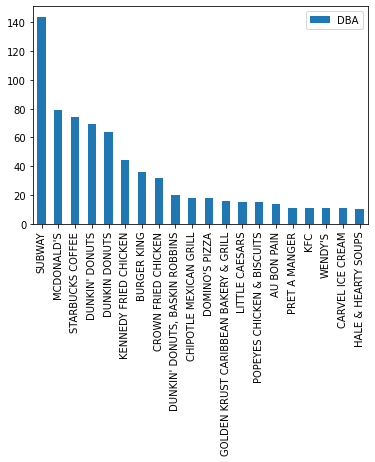

In [7]:
chains.sort_values(by="DBA", ascending= False)[:20].plot.bar()

# [Q5, 6 points] What fraction of all restaurants are chain restaurants

## Problem Statement

- A restaurant is one restaurant at one location
- e.g: So _“Wendy’s 5th Street”_ and _“Wendy’s on 10th Street”_ are two different restaurants
- Essentially a restaurant is what we defined in Q1

## Solution

In [8]:
chain_restaurant = (int)(sum(chains))

print("""Number of Restaurants part of chains: {chains},
Number of Restaurants: {res},
Fraction of Restaurants that are chain restaurants: {frac} ({chains}/{res})
""".format(chains = chain_restaurant, 
    res = len(df["RESTAURANT"].unique()),
    frac = chain_restaurant/len(df["RESTAURANT"].unique())))

Number of Restaurants part of chains: 1666,
Number of Restaurants: 10114,
Fraction of Restaurants that are chain restaurants: 0.16472216729286138 (1666/10114)



# [Q6, 6 points] Plot the number of non-chain restaurants in each boro

## Problem Statement

- First, we need to figure out all the non-chain restaurants
- Then select out only those restaurants
- Finally plot the number of such restaurants by boro.

**_Note_**

Make sure to look at the plot.  We don’t want to see the **“missing”** boro

## Solution


<AxesSubplot:>

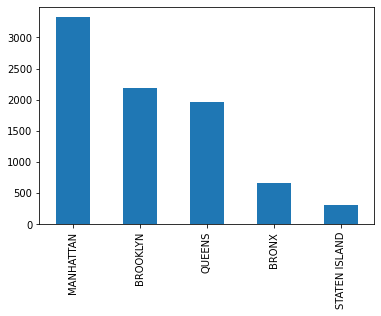

In [9]:
non_chains = df[df.apply(lambda x: x["DBA"] not in set(chains.index), axis = 1)]
non_chains["BORO"].value_counts()[:-1].plot.bar() # -1 to remove "Missing"

# [Q7, 8 points] Plot the fraction of non-chain restaurants in each boro

## Problem Statement

- The boro with the most non-chain restaurants might just be the boro with the most restaurants in general
- If we want to find the boro that attracts the most _“independent”_ restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro
- Plot this: Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants

## Solution

**No**, The borough with the *maximum independent restaurants* is ***MANHATTEN***.

However, the borough with the *highest ratio of independent restaurants* is ***BROOKLYN***.

Thus, the borough with the most independent restaurants is not the one with the highest ratio of independent restaurants.


<AxesSubplot:>

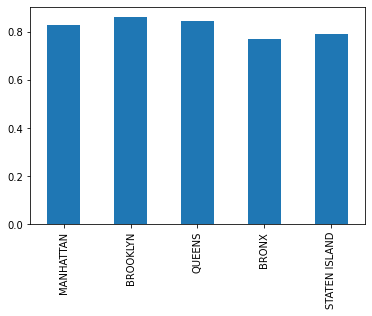

In [10]:
non_chain_frac = non_chains["BORO"].value_counts()[:-1]/df["BORO"].value_counts()[:-1]
non_chain_frac.plot.bar()

# [Q8, 6 points] Plot the popularity of cuisines

## Problem Statement

- Which cuisines are the most well-represented among all restaurants?
- Define the popularity of a cuisine as the number of restaurants serving that cuisine.
- Plot the popularity of the top 20 cuisines

## Solution


<AxesSubplot:>

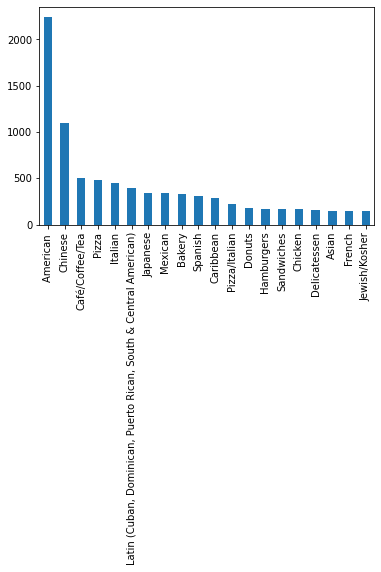

In [11]:
df["CUISINE DESCRIPTION"].value_counts()[:20].plot.bar()

# [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations

## Problem Statement

- Ideally, you should explore and see what happens when there is no violation, but here I will just tell you:  the _’VIOLATIONCODE’_ field is missing.
- First, find the restaurants that were never cited for a code violation.
- Then compute the popularity of each cuisine among these “clean” restaurants.
- Plot the popularity of the top-20 among these cuisines

## Solution


<AxesSubplot:>

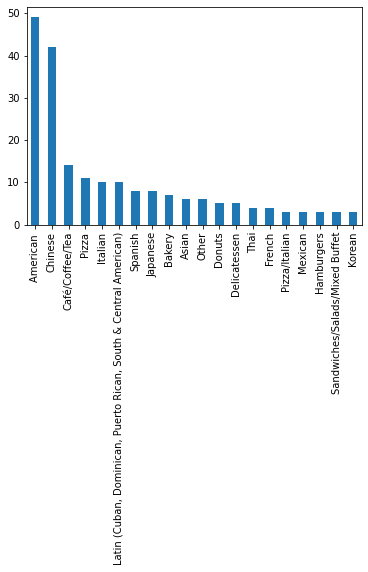

In [12]:
# Violated is a set of all Restaurants that have had ATLEAST 1 Violation
violated = set(data[data["VIOLATION CODE"].notnull() == True]["RESTAURANT"])

# Filter Restaurants from Original Dataset that have NEVER had a violation
df_clean_restaurant  = data[data["RESTAURANT"].apply(lambda x: x not in violated)].copy()

# Filter Unique Restaurants
df_clean_restaurant.drop_duplicates("RESTAURANT", inplace = True)

# Popularity of each cuisine
df_clean_restaurant["CUISINE DESCRIPTION"].value_counts()[:20].plot.bar()

In [22]:
df_clean_restaurant["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            49
Chinese                                                             42
Café/Coffee/Tea                                                     14
Pizza                                                               11
Italian                                                             10
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Spanish                                                              8
Japanese                                                             8
Bakery                                                               7
Asian                                                                6
Other                                                                6
Donuts                                                               5
Delicatessen                                                         5
Thai                                                                 4
French

# [Q10, 6 points] What cuisines tend to be the “cleanest”?

## Problem Statement

- Select all cuisines for which there were at least 20 restaurants representing that cuisine
- For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine
- Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are _“most likely to be clean”_

## Solution


In [13]:
# Ration of Clean/Total per cuisine
clean = df_clean_restaurant["CUISINE DESCRIPTION"].value_counts()
total = df["CUISINE DESCRIPTION"].value_counts()

most_clean = DataFrame([clean, total], index=["CLEAN","TOTAL"]).T
most_clean["RATIO"] = most_clean.apply(lambda x: x["CLEAN"]/x["TOTAL"], axis = 1)


# Cuisines with more than 20 restaurants representing
most_clean = most_clean[most_clean["TOTAL"] >= 20]
most_clean.sort_values(by="RATIO", ascending= False, inplace= True)

print("The 10 cuisines which are most likely to be clean are:\n ",list(most_clean[:10].index))
# most_clean[:10]

The 10 cuisines which are most likely to be clean are:
  ['Soul Food', 'Vietnamese/Cambodian/Malaysia', 'Other', 'Continental', 'Soups & Sandwiches', 'Barbecue', 'Asian', 'Chinese', 'Greek', 'Peruvian']


# [Q11, 8 points] What are the most common violations in each borough?

## Problem Statement

- Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough
- To create the table, check out the _crosstab_ function
- We will see a more general version of this when we discuss _groupby_ in class
- Once you do have the table, you will still need to find the most common violation description for each borough.

## Solution


In [14]:
table = pd.crosstab(index=data['VIOLATION CODE'], columns=data['BORO'])

# Most frequent Violations per borogh
freq_violation = table.apply(lambda x: x.idxmax())
freq_violation.drop(["Missing"], inplace=True)

for index in freq_violation.index:
    print("Most frequent Violation in {boro} is {vio}".format(boro = index, vio = freq_violation[index]))

Most frequent Violation in BRONX is 10F
Most frequent Violation in BROOKLYN is 10F
Most frequent Violation in MANHATTAN is 10F
Most frequent Violation in QUEENS is 10F
Most frequent Violation in STATEN ISLAND is 10F


# [Q12, 9 points] What are the most common violations per borough,after normalizing for the relative abundance of each violation?

## Problem Statement

Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows:
  - **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let’s call this **_violationFrequency_**
  - **Normalize:** Consider the table of number of violations by boro that you created for the previous question
  - For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by **_violationFrequency_**. We want to do this for each borough
  - **Find the biggest violations:** Now, after this normalization, for each borough, figure out the most common violation description

## Solution

## Question: Scenario?Why does Normalisation change output?


In [15]:
violationFrequency = data["VIOLATION CODE"].value_counts()

# Normalise
norm_table = table.apply(lambda x: x/violationFrequency[x.name], axis = 1)

# Max Violation per Borogh
norm_freq_violation = norm_table.apply(lambda x: x.idxmax())
norm_freq_violation.drop(["Missing"], inplace=True)

# Output
for index in norm_freq_violation.index:
    print("Most frequent Violation in {boro} is {vio}".format(boro = index, vio = norm_freq_violation[index]))
# norm_table

Most frequent Violation in BRONX is 04I
Most frequent Violation in BROOKLYN is 02D
Most frequent Violation in MANHATTAN is 03E
Most frequent Violation in QUEENS is 03G
Most frequent Violation in STATEN ISLAND is 03C


# [Q13, 8 points] How many phone area codes correspond to a single zipcode?

## Problem Statement

- The first three digits of the restaurant phone numbers are their area codes
- The area codes do not generally align with zip codes, but some area codes are only for a single zip code
- You must figure out how many areacodes have this property
- To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists

## Solution


In [16]:
ph_zip_df = data[["ZIPCODE","PHONE"]].copy()

# Area Code from Phone Number
ph_zip_df["PHONE"] = ph_zip_df["PHONE"].apply(lambda x: x[:3])

# Dropping duplicates
ph_zip_df.drop_duplicates(inplace = True)


ph2zp_mapping = ph_zip_df["PHONE"].value_counts()

print("Number of Phone Area Codes that correspond to single ZipCode are:\n",len(ph2zp_mapping[ph2zp_mapping == 1]))

Number of Phone Area Codes that correspond to single ZipCode are:
 34


# [Q14, 10 points] Find common misspellings of street names

## Problem Statement

Sometimes, it's _Avenue_, and sometimes, it's _Ave_.
We will try to come up with an automated way to find common misspellings.
The idea is the following:

- If _Ave_ and _Avenue_ are the same, they should show up often in similar-sounding street names, e.g.,Lexington Ave and Lexington Avenue
- Create a new column, called ***STREET TYPE***, which is the the last word in the name of the street
For example, if the street is _“Astoria Boulevard”_, the street type should be _“Boulevard”_
- Create another column, called ***STREET BASE***, which contains everything but the last word in the name of the street. For example, if the street is _“Astoria Boulevard”_, the street base should be _“Astoria”_
- Create a third column, called ***STREET BASE & ZIP***, that combines the street base and the zipcode
- Create a table containing just these three columns, and remove any duplicates or instances where street base is empty
- This table now contains unique street names, along with the street type
- Merge this table with itself, on the ***STREET BASE & ZIP*** column
- Thus, in the new merged tabled, we will have two ***STREET TYPE*** fields foreach ***street base and zipcode***. For example, if both _Lexington Ave_ and _Lexington Avenue_ exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue
- From the merged table, select only the rows where the street types are different
- Now, do a _cross-tabulation_ of the two distinct street types (check out the _crosstab_ function in Pandas)
- This gives us the number of times _Ave_ and _Avenue_ were used with the same ***STREET BASE & ZIP***
- From this _cross-tabulation_ table, find the most commonly street type that occurs with each of the following: _AVE,ST,RD,PL,BOULEARD,_ and _BULEVARD_

## Solution


In [17]:
# Add Columns
data["STREET TYPE"] = data["STREET"].apply(lambda x: x.split()[-1])
data["STREET BASE"] = data["STREET"].apply(lambda x: " ".join(x.split()[:-1]))
data["STREET BASE & ZIP"] = data.apply(lambda x: " ".join(x[["STREET BASE","ZIPCODE"]]), axis = 1)

In [18]:
# Create new DataFrame with a subset of columns
street_df = data[["STREET TYPE","STREET BASE","STREET BASE & ZIP"]].copy()

street_df.drop_duplicates(inplace = True)
street_df.reset_index(drop = True, inplace=True)
street_df.dropna(subset=["STREET BASE"], inplace = True)

In [19]:
# Merge DataFrame with itself on "STREET BASE & ZIP"
merged_street = street_df.merge(street_df,
                left_on="STREET BASE & ZIP",
                right_on="STREET BASE & ZIP",
                suffixes=("_x","_y"))
# print(merged_street.shape)

# Filter Rows where Left and Right STREET TYPE are different
merged_street = merged_street[merged_street["STREET TYPE_x"] != merged_street["STREET TYPE_y"]]
# print(merged_street.shape)
# merged_street

In [20]:
# Cross-Tabulation
crosstab_street = pd.crosstab(index=merged_street["STREET TYPE_x"], columns=merged_street["STREET TYPE_y"])
# crosstab_street

In [21]:
 # Find Most common match for AVE,ST,RD,PL,BOULEARD and BULEVARD
streetList = ["AVE","ST","RD","PL","BOULEARD","BULEVARD"]
misspellings = crosstab_street[streetList].apply(lambda x: x.idxmax())
for x in misspellings.index:
    print("Most Common Match for {x} is {y}".format(x = x, y = misspellings[x]))

Most Common Match for AVE is AVENUE
Most Common Match for ST is STREET
Most Common Match for RD is ROAD
Most Common Match for PL is PLACE
Most Common Match for BOULEARD is BLVD
Most Common Match for BULEVARD is BLVD


# END OF ASSIGNMENT
